In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
from getpass import getpass
import psycopg2

In [2]:
df = pd.read_csv('https://tiwen-buildamonster-bucket.s3.us-east-2.amazonaws.com/cr_to_xp.csv')
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.dropna()
df.head()

,cr,xp
0,1.0,200
1,2.0,450
2,3.0,700
3,4.0,"1,100"
4,5.0,"1,800"


In [3]:
from sqlalchemy import create_engine
password = getpass('Please enter password')

conf ={
    'host':'buildamonsterdb.ccg2p5gbrhzd.us-east-2.rds.amazonaws.com',
    'port':'5432',
    'database':'postgres',
    'user':"postgres",
    'password':password
}
engine = create_engine("postgresql://{user}:{password}@{host}:{port}/{database}".format(**conf))
conn = engine.connect()


df.to_sql('cr_to_xp', con=conn, if_exists='replace', index=False)
conn.close()

Please enter password········


In [4]:
# Import Data
password = getpass('Please enter password')
# establish connection to Amazon RDS
conn = psycopg2.connect(
    host='buildamonsterdb.ccg2p5gbrhzd.us-east-2.rds.amazonaws.com',
    port=5432,
    dbname='postgres',
    user='postgres',
    password=password
)
query = "Select * from cr_to_xp"
cr_xp_df = pd.read_sql_query(query, conn)
conn.close()
cr_xp_df.head()

Please enter password········


,cr,xp
0,1.0,200
1,2.0,450
2,3.0,700
3,4.0,"1,100"
4,5.0,"1,800"


In [5]:
cr_xp_df['xp'] = cr_xp_df['xp'].str.replace(',','')
cr_xp_df['xp'] = cr_xp_df['xp'].astype('int')
cr_xp_df['xp'].dtype

dtype('int32')

In [6]:
# Split our preprocessed data into our features and target arrays
y = cr_xp_df["xp"].values
X = cr_xp_df.drop(['xp'],axis=1).values

lr = LinearRegression().fit(X,y)
lr.score(X,y)

0.9459533071130003

In [7]:
lr.coef_

array([977.72058824])

In [8]:
lr.intercept_

-2726.25

In [9]:
cr_xp_df.columns

Index(['cr', 'xp'], dtype='object')

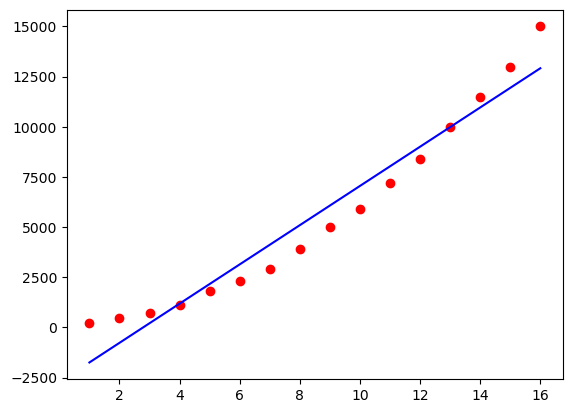

In [10]:
#Plotting Linear Regression Fit
from matplotlib import pyplot as plt

plt.scatter(X, y, color = "red")
plt.plot(X, lr.predict(X), color = "blue")
plt.show()